# 🛍️ E-Commerce Analytics: Customer Segmentation & Recommendation System

In [3]:
# 📦 1. Import and Load Dataset
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\data.csv", encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# 🧹 2. Clean and Preprocess Data
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df = df[df['TotalPrice'] > 0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
# 📊 3. Feature Engineering: RFM (Recency, Frequency, Monetary)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [8]:
# ⚙️ 4. Clustering with K-Means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

score = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.71


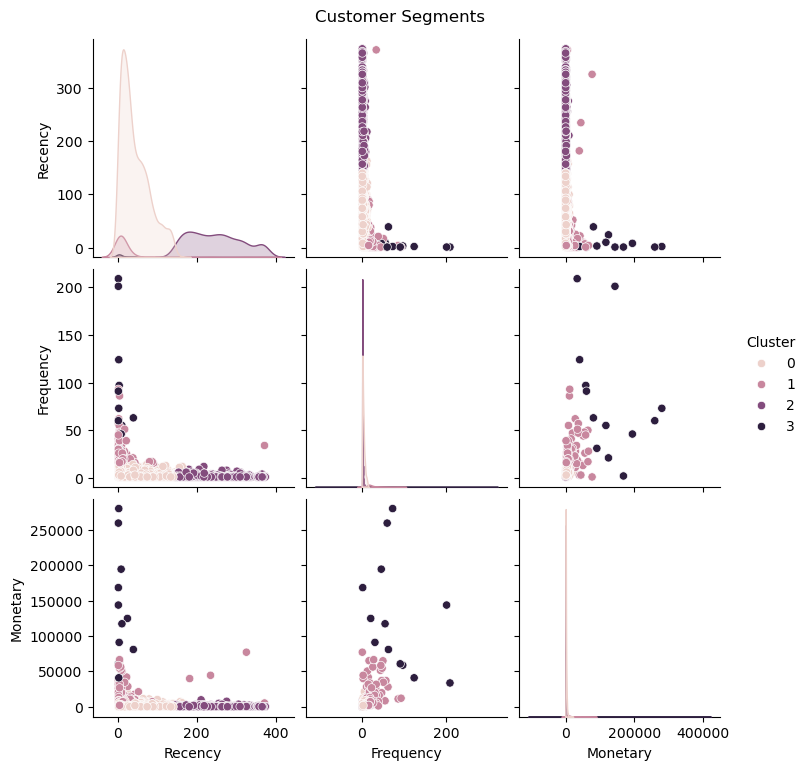

In [9]:
# 📈 5. Visualize Clusters
import seaborn as sns
import matplotlib.pyplot as plt

rfm_plot = rfm.reset_index()
sns.pairplot(rfm_plot, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'])
plt.suptitle("Customer Segments", y=1.02)
plt.show()

In [11]:
# 🤖 6. Simple Recommendation System: Top Product Per Customer
top_products = df.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index()
top_recommendations = top_products.sort_values(['CustomerID', 'Quantity'], ascending=[True, False])
top_recommendations.groupby('CustomerID').head(1).head(10)

,CustomerID,Description,Quantity
0,12346.0,MEDIUM CERAMIC TOP STORAGE JAR,74215
42,12347.0,ICE CREAM SUNDAE LIP GLOSS,240
108,12348.0,DOUGHNUT LIP GLOSS,200
190,12349.0,STRAWBERRY CERAMIC TRINKET POT,36
213,12350.0,TEA BAG PLATE RED RETROSPOT,24
253,12352.0,PINK HEART SHAPE EGG FRYING PAN,36
277,12353.0,MINI CAKE STAND WITH HANGING CAKES,8
283,12354.0,BLUE POLKADOT CUP,32
340,12355.0,ICE CREAM SUNDAE LIP GLOSS,96
351,12356.0,60 TEATIME FAIRY CAKE CASES,168


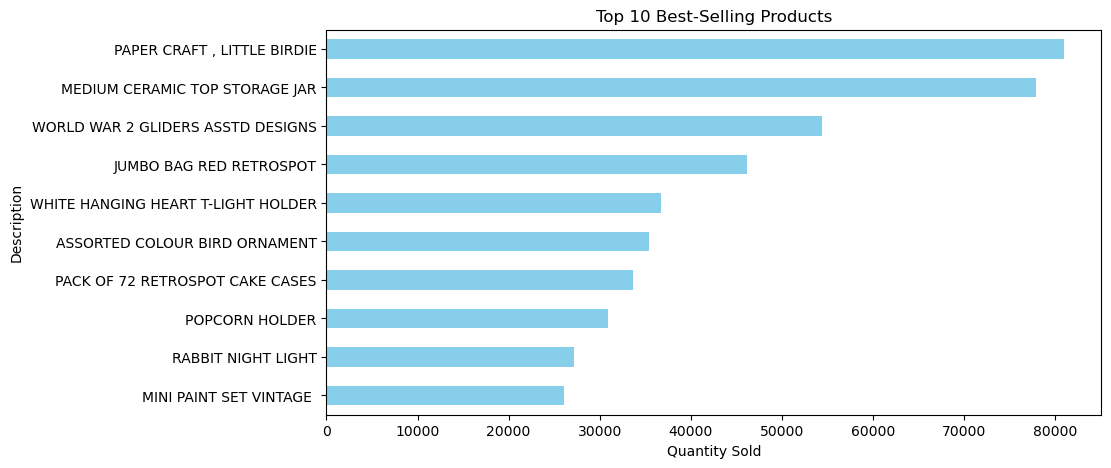

In [12]:
# 📊 7. Extra Insights: Best-Selling Products
best_sellers = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

best_sellers.plot(kind='barh', figsize=(10, 5), title="Top 10 Best-Selling Products", color="skyblue")
plt.xlabel("Quantity Sold")
plt.gca().invert_yaxis()
plt.show()

In [39]:
pip install ipywidgets 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
df.to_csv("cleaned_data.csv", index=False)

In [48]:
rfm.to_csv("rfm_clusters.csv")

In [ ]:
#Filter by date range and country

#Plot:

#Revenue over time

#Top 10 products

#Customer segmentation (using RFM + KMeans)

In [51]:
jupyter nbextension enable --py widgetsnbextension --sys-prefix
jupyter nbextension install --py widgetsnbextension --sys-prefix

SyntaxError: invalid syntax (1188951427.py, line 1)

In [52]:
# 📦 Import Libraries
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display

In [53]:
# 📁 Load Dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\data.csv", encoding="ISO-8859-1")
df.dropna(subset=['CustomerID'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df = df[df['TotalPrice'] > 0]

In [54]:
import ipywidgets as widgets
from IPython.display import display

# Set up start and end date pickers
min_date = df["InvoiceDate"].min().date()
max_date = df["InvoiceDate"].max().date()

start_date = widgets.DatePicker(
    description='Start Date',
    value=min_date,
)

end_date = widgets.DatePicker(
    description='End Date',
    value=max_date,
)

In [55]:
def filter_data(df, start_date, end_date, countries):
    mask = (df["InvoiceDate"].dt.date >= start_date) & \
           (df["InvoiceDate"].dt.date <= end_date) & \
           (df["Country"].isin(countries))
    return df[mask]

In [56]:
def create_dashboard(start_date, end_date, countries):
    filtered = filter_data(df, start_date, end_date, countries)
    # ... (rest of the dashboard code)

In [57]:
ui = widgets.VBox([start_date, end_date, country_dropdown])
out = widgets.interactive_output(
    create_dashboard,
    {'start_date': start_date, 'end_date': end_date, 'countries': country_dropdown}
)

display(ui, out)

Output()